In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import firwin
from shoebox.firwin_torch import firwin_torch
from shoebox.firwin_scipy import firwin_scipy
import pandas as pd


In [3]:
#df = pd.read_csv('./results/real_room_ir_0_None_K_values.txt', )
#df = pd.read_csv('./results/ism_280_multi_low_0_None_K_values.txt', )
df = pd.read_csv('./imgs/ism_L1Loss_0_280/ism_280_multi_low_0_280_L1Loss_kValues.txt', )

In [14]:
df.shape

(60, 7)

In [2]:
0.6**2

0.36

In [31]:
df.drop(df[df.Min_Loss > 1000].index, inplace=True)

Max:59.631947 and Min:9.696009


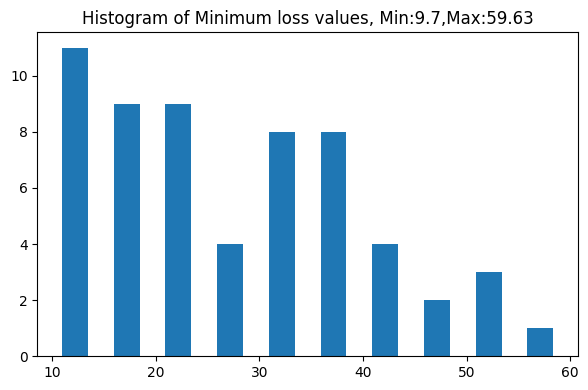

In [33]:
print(f"Max:{df['Min_Loss'].max()} and Min:{df['Min_Loss'].min()}")
plt.figure(figsize=(6,4))
plt.hist(df['Min_Loss'],  rwidth=0.5)
#plt.xticks(ticks=np.arange(70),  )
plt.title(f"Histogram of Minimum loss values, Min:{np.round(np.float64(df['Min_Loss'].min()),2)},Max:{np.round(np.float64(df['Min_Loss'].max()),2)}")
plt.tight_layout()
plt.show()

In [28]:
#df.rename(columns={'Rir No':'Rir_No'}, inplace=True)
#df.to_csv('ism_14_0_14_K_values.txt', index=False)

In [1]:
9e-1

0.9

In [4]:
df.loc[df['Rir_No'] < 4]

,Kx,Ky,Kz,Noise,Convergence,Min_Loss,Rir_No
0,-0.162264,-0.122281,-0.048483,-4.029811e+02,1.0,5.287024,1.0
1,-0.088613,-0.070946,-0.055972,-5.982221e+02,1.0,3.119328,1.0
2,-0.087186,-0.093525,-0.097096,-5.631847e+06,1.0,4.996693,1.0
3,-0.062731,-0.062422,-0.063042,-8.120909e+02,1.0,7.401798,1.0
4,-0.132236,-0.056015,-0.053646,-9.568495e+02,0.0,9.582401,1.0
5,-0.053898,-0.055368,-0.051983,-1.693762e+02,0.0,10.923508,1.0
6,-0.171613,-0.111347,-0.080517,-7.089064e+02,1.0,1.695617,2.0
7,-0.188457,-0.103889,-0.085995,-2.635627e+02,1.0,2.156970,2.0
8,-0.185773,-0.152476,-0.081095,-5.374490e+02,1.0,4.687319,2.0
9,-0.148022,-0.086541,-0.075078,-5.540399e+02,1.0,5.083507,2.0


### ISM dataset handling

In [2]:
def calculate_damping_coeff(betas, lengths):
    ''' 
    Calculate the damping density coefficients from Betas and length parameters
    betas: a 6x1 array of all reflection coefficients
    lengths: 3x1 array of all wall measurements
    '''
    Kx = np.log(np.prod(betas[0:2])) / lengths[0]
    Ky = np.log(np.prod(betas[2:4])) / lengths[1]
    Kz = np.log(np.prod(betas[4:6])) / lengths[2]
    return Kx, Ky, Kz

In [3]:
ism_g = np.load('./rirData/ism_280_multi_low.npy', allow_pickle=False)
print(ism_g.shape)

(280, 96009)


In [4]:
k_arr = np.zeros(3)
for it in ism_g:
    temp = np.zeros(3)
    lengths, betas = it[:3], it[3:9]
    kValues = np.sort(calculate_damping_coeff(betas, lengths))
    for ix in range(6):
        temp = np.vstack((temp, kValues))
    temp = temp[1:]
    k_arr = np.vstack((k_arr, temp))
k_arr = k_arr[1:]
print(k_arr.shape)

(1680, 3)


In [113]:
df = pd.read_csv('./imgs/ism_L1Loss_0_280/ism_280_multi_low_0_280_L1Loss_kValues_new.txt', )
df.shape

(1680, 11)

In [114]:
df.loc[df['Min_Loss'].idxmax()]

Kx              -0.161472
Ky              -0.036236
Kz              -0.025139
Noise         -438.913450
Convergence      0.000000
Min_Loss        21.583235
Rir_No         174.000000
Kx_g            -0.199548
Ky_g            -0.195473
Kz_g            -0.079143
mean_diff        0.083772
Name: 1043, dtype: float64

In [121]:
df.loc[df['Rir_No'] == 76]['Min_Loss'], np.sum(df.loc[df['Rir_No'] == 76]['Min_Loss'])

(450     3.658733
 451     5.364836
 452     8.005838
 453     9.325951
 454     9.214705
 455    11.611276
 Name: Min_Loss, dtype: float64,
 47.1813391)

In [116]:
ll = []
for i in range(280):
    ll.append(np.sum(df.loc[df['Rir_No'] == (i+1)]['Min_Loss']))

In [117]:
len(ll)

280

In [118]:
np.argmax(ll), np.max(ll)

(267, 54.1971066)

In [22]:
for idx, x in enumerate(['Kx_g', 'Ky_g', 'Kz_g']):
    df[x] = k_arr[:, idx]

In [23]:
df.head()

,Kx,Ky,Kz,Noise,Convergence,Min_Loss,Rir_No,Kx_g,Ky_g,Kz_g
0,-0.121128,-0.054152,-0.053079,-157.58206,1.0,2.536233,1.0,-0.239987,-0.168105,-0.031253
1,-0.169477,-0.125793,-0.051126,-839.28180,1.0,3.344847,1.0,-0.239987,-0.168105,-0.031253
2,-0.165219,-0.144802,-0.054378,-1014.95200,1.0,5.470519,1.0,-0.239987,-0.168105,-0.031253
3,-0.073513,-0.057695,-0.058072,-48124.09000,1.0,6.739348,1.0,-0.239987,-0.168105,-0.031253
4,-0.081653,-0.076254,-0.051797,-134.56420,1.0,8.664200,1.0,-0.239987,-0.168105,-0.031253


In [24]:
df['mean_diff'] = (np.abs(df['Kx'] - df['Kx_g']) + np.abs(df['Ky'] - df['Ky_g']) + np.abs(df['Kz'] - df['Kz_g'])) /3

In [25]:
df.head()

,Kx,Ky,Kz,Noise,Convergence,Min_Loss,Rir_No,Kx_g,Ky_g,Kz_g,mean_diff
0,-0.121128,-0.054152,-0.053079,-157.58206,1.0,2.536233,1.0,-0.239987,-0.168105,-0.031253,0.084879
1,-0.169477,-0.125793,-0.051126,-839.28180,1.0,3.344847,1.0,-0.239987,-0.168105,-0.031253,0.044232
2,-0.165219,-0.144802,-0.054378,-1014.95200,1.0,5.470519,1.0,-0.239987,-0.168105,-0.031253,0.040399
3,-0.073513,-0.057695,-0.058072,-48124.09000,1.0,6.739348,1.0,-0.239987,-0.168105,-0.031253,0.101234
4,-0.081653,-0.076254,-0.051797,-134.56420,1.0,8.664200,1.0,-0.239987,-0.168105,-0.031253,0.090243


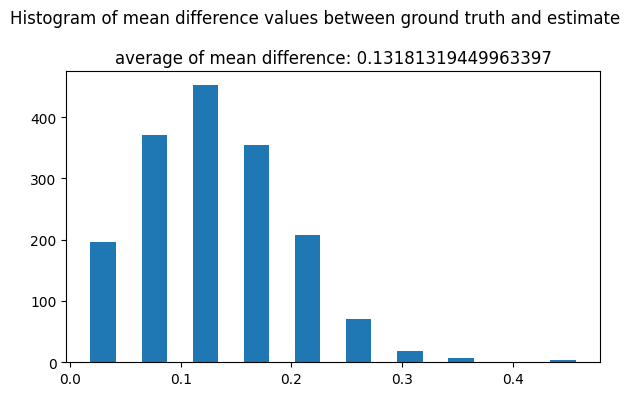

In [26]:
plt.figure(figsize=(6,4))
plt.hist(df['mean_diff'],  rwidth=0.5)
plt.suptitle(f"Histogram of mean difference values between ground truth and estimate")
plt.title(f"average of mean difference: {np.average(df['mean_diff'])}")
plt.tight_layout()
#plt.show()
plt.savefig('./imgs/ism_L1Loss_0_280_slice4k/Histogram_mean_diff_ism_280_multi_low_0_280_L1Loss.jpg')

In [27]:
df.to_csv('./imgs/ism_L1Loss_0_280_slice4k/ism_280_multi_low_0_280_L1Loss_kValues_new.txt', index=False)

In [9]:
np.average(df['mean_diff'])

0.13185297669494328